<a href="https://colab.research.google.com/github/Roho1999/Bachelor_Thesis/blob/main/Semi_Random_Uncertainty_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning the data

In [ ]:
"""
Created on Thu Sep 16 16:18:51 2021
@author: Robin Feldmann
"""
import re
import string
import numpy as np
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
import matplotlib.pyplot as plt
%load_ext tensorboard

#Simpliefies the Data to 3 labels Positive, Negative and Neutral
def convert_Sentiment(sentiment):
    if sentiment == "Extremely Positive":
        return 2
    elif sentiment == "Extremely Negative":
        return 0
    elif sentiment == "Positive":
        return 2
    elif sentiment == "Negative":
        return 0
    else:
        return 1

#removes all URLs 
def remove_URL(text):
    url = re.compile(r"https?://\S+|www\.\S+")
    return url.sub(r"", text)

#removes hashtags
def remove_hashtags(text):
   
    text =  re.sub(r"#\w+", " ", text)
    return text

#deletes all numbers
#this doesn't increases performance and results, so it isn't used
def remove_numbers(text):
    text = re.sub(r"\d+", " ", text)
    return text

#removes words with 2 or less letters
#this doesn't increases performance and results, so it isn't used
def remove_short_words(text):
    
    text = re.sub(r'\b\w{1,2}\b', " ", text)
    
    return text


#removes all mentions in form of @name
#names are not important for the sentiment and bad for tokenization and
#embedding
#led to a relatively strong increase in performance
def remove_mentions(text):
    text = re.sub(r"@([a-zA-Z0-9_.-]{1,100})", " ", text)
    return text

#removes contractions
#this doesn't increases performance and results, so it isn't used
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text   



def remove_punct(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords


stop = set(stopwords.words("english"))
#remove all stopwords from text and seperate every lowers words with space
def remove_stopwords(text):
    
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    
    return " ".join(filtered_words)



#takes chars that are more then doubled and presents them as double chars
#Example "Helllllo" --> "Hello"
#helps to identify identical words with misspellings
def repeated_char(text):
    rchar = text.group(0) 
    
    if len(rchar) > 1:
        return rchar[0:2] 

#helper function for repeated_char
def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute



#returns text as lower case
def to_lower(text):
    
    return text.lower()


#removes articles from data, leads to less complex data and no hit in accuracy
def remove_articles(text):


  articles = {'a': '', 'an':'', 'and':'', 'the':''}
  rest = []
  for word in text.split():
    if word not in articles:
      rest.append(word)
  return ' '.join(rest)

#counts how often a word is used and determines the number of unique words
def count_words(text_col):
   
    
    count = Counter()
    for text in text_col.values:
        for word in text.split():
            count[word] += 1
    number_unique_words = len(count)
    return count, number_unique_words




#tokenize the words 
def tokenize(train_sentences, val_sentences, num_unique_words):
   

    #vectorize a text corpus by turning each text into a sequence of integers
    tokenizer = Tokenizer(num_words=num_unique_words)
    
    tokenizer.fit_on_texts(np.append(train_sentences, val_sentences))
    
    word_index = tokenizer.word_index
    return tokenizer, word_index

#shows a simple barplot of given data 
def simple_barplot(data,names="",color=['green','red', 'black', 'blue', 'violet'],
                   title="", labelx="", labely=""):
    
    f = plt.figure()
    plt.bar(x = data, height = names, color=color)
    f.set_figwidth(10)
    plt.title(title, fontweight="heavy")
    plt.ylabel(labely, fontweight="heavy")
    plt.xlabel(labelx, fontweight="heavy")
    plt.show()
    #f.savefig(f"barplot_{color[-1]}.png")
    #files.download(f"barplot_{color[-1]}.png")

#no hugh difference for the length to cut outliers: so not used
#maybe because tweets are inherently limited to a certain amount of letters
#sequences are just padded to the longest sequence
#twitter only allows for 280 characters
def show_length_distribution(train_sequences):
    
    #statistic of tweet length
    tweet_len=[len(item) for item in train_sequences]
    
    #important stats
    max_len = len(max(train_sequences, key=len))
    print(f"Length longest squence: {max_len}")
    quantile = np.quantile(tweet_len, 0.99)
    print(f"99% quantile: {quantile}")
    '''
    #plot
    dist = plt.figure()
    plt.scatter(np.arange(len(tweet_len))[::100], tweet_len[::100], color = "b")
    plt.axhline(quantile, color = "r")
    plt.title('Tweet-length')
    plt.ylabel('Length')
    plt.xlabel('Tweet-index')
    plt.legend(['99% Quantile', 'Tweets'], loc='upper right')
    plt.show()
    '''
    #dist.savefig("Length_distribution.png")
    #files.download("Length_distribution.png")
    #return int(quantile)
    return int(max_len)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## To use the code, download the train and test data from https://www.kaggle.com/datatattle/covid-19-nlp-text-classification and upload it to colab named corona_tweets_train.csv and corona_tweets_test.csv respectively

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

"""
loading the corona tweets training and test data
from https://www.kaggle.com/datatattle/covid-19-nlp-text-classification

"""
df = pd.read_csv("corona_tweets_train.csv", encoding='latin1')
df_test = pd.read_csv("corona_tweets_test.csv", encoding='latin1')


#append the test data to the df to do the cleaning on both, after that split 
#split again
df = df.append(df_test)
#print(df.head())

#remove unnessessary colums 
df = df.drop(['Location','TweetAt','ScreenName'], axis=1)

#print(df.head())

"""
Process the target sentiments help:

"""

#show the distribution of sentiments
#simple_barplot(df.Sentiment.value_counts().index, df.Sentiment.value_counts().values,
#                   title="Original Data Distribution", labelx="Labels", labely="Samples") 

#simplify to positive,neutral and negative

df.Sentiment = df.Sentiment.apply(lambda x : convert_Sentiment(x))



#show new labels df.Sentiment.value_counts().index
#simple_barplot(["2 (Positive)","0 (Negative)","1 (Neutral)"], df.Sentiment.value_counts().values
#               ,title="Simplified Data Distribution", labelx="Labels", labely="Samples",
#               color = ["green", "red", "black"]) 




"""
Clean and preprocess the data, removing duplicates, punctation, URLs
and stopwords. Functions from utils.
"""
df = df.drop_duplicates()
print("\nOriginal Shape: ", df.shape, "\n")
print("No preprocessing:\n",df["OriginalTweet"].head(5))

#removes URLs, mentions, hashtags and short words in dataset   
df["OriginalTweet"] = df.OriginalTweet.map(remove_URL)

df["OriginalTweet"] = df.OriginalTweet.map(remove_mentions)

#does not increase accuracy or performance
#df["OriginalTweet"] = df.OriginalTweet.map(decontraction)

#increases accuracy and performance
df["OriginalTweet"] = df.OriginalTweet.map(remove_hashtags)


#removing short words does not lead to better accuracy
#df["OriginalTweet"] = df.OriginalTweet.map(remove_short_words)


#removing numbers does not changes accuracy by a lot but decreases runtime
df["OriginalTweet"] = df.OriginalTweet.map(remove_numbers)


#removes punctation dataset
df["OriginalTweet"] = df.OriginalTweet.map(remove_punct)


#removes stopwords dataset, and also removes multible consecutive spaces
#decreases complexity of the samples but also decreases accuracy significantly 
df["OriginalTweet"] = df.OriginalTweet.map(remove_stopwords)

#remove double words
df['OriginalTweet'] = df['OriginalTweet'].apply(lambda x : unique_char(repeated_char,x))

#all to lower case
df["OriginalTweet"] = df.OriginalTweet.map(to_lower)

df["OriginalTweet"] = df.OriginalTweet.map(remove_articles)



print("\nAfter prep.:\n ", df["OriginalTweet"].head(5))

#gets a list of word counts "counter" and the number of unique words
counter, num_unique_words = count_words(df.OriginalTweet)

print("\n", "The number of unique words in the OriginalTweet column: ", 
      num_unique_words, "\n")

'''

split dataset into original training and validation set 

'''


train_df = df[:41157]

val_df = df[41157:]

#split text and labels into numpy arrays
train_sentences = train_df.OriginalTweet.to_numpy()
train_labels = train_df.Sentiment.to_numpy()
val_sentences = val_df.OriginalTweet.to_numpy()
val_labels = val_df.Sentiment.to_numpy()


# Convert labels to categorical 
train_labels = to_categorical(train_labels, 3)
val_labels  = to_categorical(val_labels, 3)
print(f"The shape of the training and validation data: \n",
f"{train_sentences.shape} \n {val_sentences.shape} \n")
#create a tokenizer on the whole dataset and the respective word_index
tokenizer, word_index = tokenize(train_sentences, val_sentences, num_unique_words)

"""
tokenize the validation and trainings data 
"""
train_sequences = tokenizer.texts_to_sequences(train_sentences)
val_sequences = tokenizer.texts_to_sequences(val_sentences)
                                           
print(f"Sequence example: {train_sequences[0]}")

'''
show the distribution of the tweet-length and the maximal length
to find a good pad-size
'''

pad_size = show_length_distribution(train_sequences)


'''
pads the squences length of the longest tweet 
to simplify training
'''

train_padded = pad_sequences(train_sequences, maxlen = pad_size, 
                             padding="post", truncating="post")

val_padded = pad_sequences(val_sequences, maxlen = pad_size,
                             padding="post", truncating="post")




Original Shape:  (44955, 3) 

No preprocessing:
 0    @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1    advice Talk to your neighbours family to excha...
2    Coronavirus Australia: Woolworths to give elde...
3    My food stock is not the only one which is emp...
4    Me, ready to go at supermarket during the #COV...
Name: OriginalTweet, dtype: object

After prep.:
  0                                                     
1    advice talk neighbours family exchange phone n...
2    coronavirus australia woolworths give elderly ...
3    food stock one empty please dont panic enough ...
4    ready go supermarket outbreak im paranoid food...
Name: OriginalTweet, dtype: object

 The number of unique words in the OriginalTweet column:  40974 

The shape of the training and validation data: 
 (41157,) 
 (3798,) 

Sequence example: []
Length longest squence: 41
99% quantile: 30.0


# The Model

In [ ]:
'''
create LSTM model 
'''
name = "Bothreguse4_12_16"
from tensorflow.keras import layers, regularizers

#regularizers and constraints
l1 = regularizers.l1(1e-4)
constraint = tf.keras.constraints.max_norm(3.)


model = keras.models.Sequential()

model.add(layers.Embedding(num_unique_words, 512 , input_length = pad_size))

#adding a convolutional layer didn't help the learning prozess, contrary to the paper 
#"Evaluation of Deep Learning Techniques in
#Sentiment Analysis from Twitter Data"

#breaks down the dimesionality of data and speeds up the learning significantly

#bidirectional because it is works well for language processing, since language is recursive by nature
#dropout to reduce overfitting on small details 
#regularizer to reduce exploding gradients
#
# with 512 dimensions best result but slower
model.add(layers.Bidirectional(
    layers.LSTM(512, return_sequences=True,
                recurrent_regularizer =l1,
                dropout =0.2,
                kernel_constraint= constraint,
                bias_constraint = constraint
                )))

#MaxPool worked better than global average pooling
model.add(layers.GlobalMaxPool1D())



model.add(layers.Dense(32, activation= "relu", 
                       bias_regularizer = l1))
                     

model.add(layers.Dropout(0.2))



model.add(layers.Dense(3, activation= "softmax"))

print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 41, 512)           20978688  
                                                                 
 bidirectional (Bidirectiona  (None, 41, 1024)         4198400   
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 1024)             0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                32800     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 9

In [ ]:
#creates a new model with the same architecture but new weights for experiment 
#with Uncertainty Sampling
model_entro = tf.keras.models.clone_model(model)


#compile the model
loss= keras.losses.CategoricalCrossentropy(from_logits = False)
#small learning rate to get a clear understanding of the learning curve and
#better comparability
optim = keras.optimizers.Adam(learning_rate=0.00006)
metrics = ["accuracy",tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
model_entro.compile(loss=loss, optimizer=optim, metrics=metrics)


# Different Implementations for calculating the entropy

The fastest implementation with simple numpy functions.
this implementation (list_entropys3) is faster than the list_entropys1 function (with scpy.stats.entropy) by around 88.9006%:

(100/0.0946) * 0.0105 - 100 = -88.9006 %

In [ ]:
'''
fastest implementation with numpy log
gets the prediction of the model over the whole set of samples then computes
entropy

in a trial with 640 samples it took 6.734 seconds, 0.0105s per sample
'''
def list_entropys3(model, training_pool):

  """ Computes entropy of label distribution. """
  entropys = []
  probs = model.predict(training_pool)
  for i in range(0,len(probs)):
    entro = 0.
   
    prob = probs[i]
    # Compute entropy
   
    for j in prob:
      entro -= j * np.log(j)

    entropys.append(entro)
  
  return entropys

Two slower functions to compute the entropy for the whole dataset.

In [ ]:

from scipy.stats import entropy
from numpy import e,log


#the two functions give back the list of the list of entropies of the training_pool in respect to
#the model


#slower implementation with scipy.stats.entropy 
#in a trial with 640 samples it took 60.56 seconds, 0.0946s per sample
def list_entropys(model, training_pool):
  entropys = []
 
  for i in range(0,len(training_pool)):
  
    entro = entropy(model.predict(training_pool[[i][:]]).reshape(3,))
    entropys.append(entro)
  return entropys

#faster implementation with numpy log
#in a trial with 640 samples it took 50.07 seconds, 0.0782s per sample
def list_entropys2(model, training_pool):

  """ Computes entropy of label distribution. """
  entropys = []
  for i in range(0,len(training_pool)):
    entro = 0.
   
    probs = model.predict(training_pool[[i][:]]).reshape(3,)
    # Compute entropy
   
    for i in probs:
      entro -= i * np.log(i)

    entropys.append(entro)
  
  return entropys



## Testing execution speed

In [ ]:

# '''
# Testing 1. implementation of entropy
# '''
# import copy
# training_pool = copy.deepcopy(train_padded)
# training_label = copy.deepcopy(train_labels)
# #select
# training_pool = training_pool[:,:] 
# training_label = training_label[:,:]

# import time
# start_time = time.time()
# entros = np.array(list_entropys(model_entro, training_pool))
# print("--- %s seconds ---" % (time.time() - start_time))

# #entros = np.array(list_entropys(model_entro, training_pool))
# print(entros)
# #print(training_pool)

# #sortes the training pool samples by their entropy value in descending order
# arr1inds = entros.argsort()
# sorted_arr1 = entros[arr1inds[::-1]]
# sorted_arr2 = training_pool[arr1inds[::-1]]

# print(sorted_arr1)
# print(sorted_arr2)

In [ ]:
# '''
# Testing 2. implementation of entropy
# '''

# start_time = time.time()
# entros2 = np.array(list_entropys2(model_entro, training_pool))
# print("--- %s seconds ---" % (time.time() - start_time))


# #print(entros2)

# arr1inds = entros2.argsort()
# sorted_entropys = entros2[arr1inds[::-1]]
# sorted_samples = training_pool[arr1inds[::-1]]

# print(sorted_entropys)
# print(sorted_samples)


In [ ]:
# '''
# Testing 3. implementation of entropy test: 
# '''

# start_time = time.time()
# entros3 = np.array(list_entropys3(model_entro, training_pool))
# print("--- %s seconds ---" % (time.time() - start_time))


# #print(entros2)

# arr1inds = entros3.argsort()
# sorted_entropys = entros3[arr1inds[::-1]]
# sorted_samples = training_pool[arr1inds[::-1]]

# print(sorted_entropys)
# print(sorted_samples)

## Training the model 

In [ ]:
"""
train the model and return the accuracy and val_accuracy
"""

def train_model(model, train_padded, train_labels, val_padded, val_labels):

  import datetime
 
  # Clear any logs from previous runs
  !rm -rf /logs/

  #clearing memory to avoid clutter from old runs
  tf.keras.backend.clear_session()
 
  ## Hyperparameters
  epochs = 30
  batchsize = 64
  early_stopping = keras.callbacks.EarlyStopping(monitor ="val_loss", 
                                          mode ="min", patience=2)

  #create the log file for tensorboard
  log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

  
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
 


  checkpoint_filepath = '/tmp/checkpoint'
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
  filepath=checkpoint_filepath,
  save_weights_only=True,
  monitor='val_accuracy',
  mode='max',
  save_best_only=True)
   
  #shuffels dataset before training so that the order isn't always the same and
  #model isn't bias towards the first samples more
  #then trains with given parameters
  history = model.fit(train_padded,
                      train_labels,
                      epochs=epochs,
                      batch_size = batchsize,
                      validation_data=(val_padded, val_labels),
                      callbacks=[early_stopping,tensorboard_callback,
                        model_checkpoint_callback],
                      verbose=1, shuffle=True)

  model.load_weights(checkpoint_filepath)

  return model, history.history['accuracy'][:], history.history['val_accuracy'][:]

# Main Training-Loop

In [ ]:
#helper function to reset weights after each loop
weights = model_entro.get_weights()
reset_model = lambda model: model.set_weights(weights)


Iteration :1 - Samples: 2048 
 
Epoch 1/30
32/32 [==============================] - 10s 206ms/step - loss: 4.6015 - accuracy: 0.4102 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.3924 - val_accuracy: 0.4300 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/30
32/32 [==============================] - 4s 129ms/step - loss: 4.2052 - accuracy: 0.4126 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 4.0092 - val_accuracy: 0.4300 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/30
32/32 [==============================] - 4s 126ms/step - loss: 3.8445 - accuracy: 0.4551 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 3.6619 - val_accuracy: 0.4300 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/30
32/32 [==============================] - 5s 156ms/step - loss: 3.5160 - accuracy: 0.4443 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 3.3488 - val_accuracy: 0.4326 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 

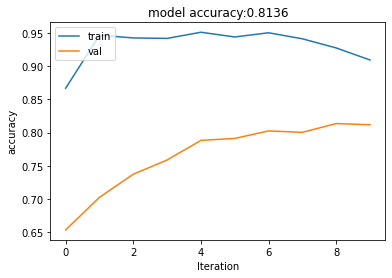

In [ ]:
import copy

###HYPERPARAMETERS
x= 2048
lam = 0.5
x_half = int(x*lam)
loops = 10
patience = 10


# copy the padded training data and training labels for future use
training_pool = copy.deepcopy(train_padded)
training_label = copy.deepcopy(train_labels)
#select
training_pool = training_pool[:,:] 
training_label = training_label[:,:]



selected_samples = np.zeros( shape =(0,pad_size), dtype=np.int32)
selected_labels  = np.zeros( shape =(0,3), dtype=np.int32)

#take the first x random samples from the training pool and the labels to train
#the model 
#also delete the used samples from original training_pool and training_label

#512*32= 16384 around half of the samples used for the orginial model
#x are the amount of samples that are added in each iteration


selected_samples = np.append(selected_samples, training_pool[:x][:], axis=0)
training_pool = np.delete(training_pool,slice(0,x) , axis=0)

selected_labels = np.append(selected_labels, training_label[:x][:], axis=0)
training_label = np.delete(training_label,slice(0,x) , axis=0)


'''
repeat loops times:
  train the model for one loop and calculate the entropy in respect to the trained
  model, select 1/2x new samples with highest entropy and 1/2x random samples, reset model and relearn on the 
  new + old samples
'''



val_accuracies = []
train_accuracies = []
wait = 0
best = 1

for i in range(loops):

  print(f"\nIteration :{i+1} - Samples: {(i+1)*x} \n ")
  
  #clearing the old model graph and reset all the weights
  keras.backend.clear_session()
  reset_model(model_entro)
  
  
  model_entro, train_accuracy, val_accuracy = train_model(model_entro,
                                                          selected_samples,
                                                          selected_labels,
                                                          val_padded, val_labels)
  
  #adding max accuracy from each iteration to the accuracy lists
  max_index = np.argmax(val_accuracy)
  val_accuracies.append(val_accuracy[max_index])
  train_accuracies.append(train_accuracy[max_index])
  
  '''
  Select and add the random samples to the selected samples set
  and labels. Then delete the samples from training pool.
  '''

  #add the 1/2x random samples
  random_idx = np.random.randint(np.size(training_pool, axis = 0), size=x_half)
  selected_samples = np.append(selected_samples, training_pool[random_idx][:], axis=0)
  selected_labels = np.append(selected_labels, training_label[random_idx][:], axis=0)


  #delete the selected samples and labels from original pool
  training_pool = np.delete(training_pool,random_idx , axis=0)
  training_label = np.delete(training_label,random_idx , axis=0)
  

  
  '''
  Select and add the samples with highest entropy to the selected samples set
  and labels. Then delete the samples from training pool.
  '''
  #get the entropys and sort samples and labels in order of decending entropy
  entros = np.array(list_entropys3(model_entro, training_pool))

  #sort the set into partitions with highest x_half entropies in the first x indices
  sorted_indices = np.argpartition(entros, -x_half)[::-1]

  sorted_entropys = entros[sorted_indices]
  training_pool = training_pool[sorted_indices]
  training_label = training_label[sorted_indices]


  #add the 1/2x samples with the highest entropy values to the selected samples and
  #labels

  
  selected_samples = np.append(selected_samples, training_pool[:x_half][:], axis=0)
  selected_labels = np.append(selected_labels, training_label[:x_half][:], axis=0)

 

  #delete the selected samples and labels from orginal pool 
  training_pool = training_pool[x_half:][:]
  training_label = training_label[x_half:][:]

  '''
  early stopping method that doesn't need labeled test data:
  if the uncertainty for the test data does not 
  decrease for a certain amount of iterations the training stops
  '''
  #val = val_accuracy[max_index]

 
  mean_entropy = np.mean((list_entropys3(model_entro, val_padded)))

  
  wait += 1
  if mean_entropy < best:
    best = mean_entropy
    wait = 0
  if wait >= patience:
    break

  
  print(f"Mean entropy for test data: {mean_entropy} - Lowest entropy for test data: {best}")


'''
visualize training
'''
test = plt.figure()
plt.plot(train_accuracies)
plt.plot(val_accuracies)
plt.ylabel('accuracy')
plt.xlabel('Iteration')
plt.legend(['train', 'val'], loc='upper left')

result = np.round(np.amax(val_accuracies), decimals = 4)
plt.title(f'model accuracy:{result}' )
plt.show()

In [ ]:
from numpy import asarray
from numpy import savetxt
from google.colab import files
'''
Saving the learning curve in csv file for later inspection.
'''

savetxt('val_accuracies.csv', np.round(val_accuracies, decimals= 4) , delimiter=',')

savetxt('train_accuracies.csv', np.round(train_accuracies, decimals= 4) , delimiter=',')

files.download('train_accuracies.csv')
files.download('val_accuracies.csv')

print(val_accuracies)




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[0.6537651419639587, 0.7027382850646973, 0.7374933958053589, 0.7588204145431519, 0.788309633731842, 0.791205883026123, 0.802527666091919, 0.8004212975502014, 0.8135861158370972, 0.8117430210113525]
